<a href="https://colab.research.google.com/github/umayu06/Object-Detection/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


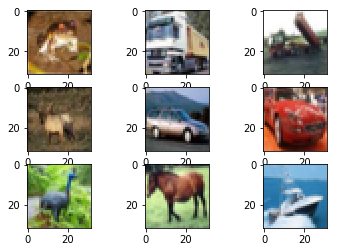

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [0]:
from keras.utils import to_categorical

In [0]:
# load train and test dataset
#def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
trainX = trainX.astype('float32')
testX= testX.astype('float32')
	# normalize to range 0-1
trainX = trainX/ 255.0
testX = testX/ 255.0
	# return normalized images
	#return train_norm, test_norm

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

In [0]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # Compile model
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  print(model.summary())
  return model

In [7]:
history=model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)
print(history)

W0730 06:29:50.911000 140534431823744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 17s 345us/step - loss: 1.6650 - acc: 0.3960 - val_loss: 1.3309 - val_acc: 0.5164
Epoch 2/25
50000/50000 [==============================] - 11s 218us/step - loss: 1.2910 - acc: 0.5362 - val_loss: 1.1416 - val_acc: 0.5968
Epoch 3/25
50000/50000 [==============================] - 11s 212us/step - loss: 1.1146 - acc: 0.6024 - val_loss: 1.0386 - val_acc: 0.6376
Epoch 4/25
50000/50000 [==============================] - 11s 214us/step - loss: 0.9845 - acc: 0.6512 - val_loss: 0.9807 - val_acc: 0.6570
Epoch 5/25
50000/50000 [==============================] - 11s 214us/step - loss: 0.8860 - acc: 0.6863 - val_loss: 0.9570 - val_acc: 0.6582
Epoch 6/25
50000/50000 [==============================] - 11s 212us/step - loss: 0.8044 - acc: 0.7169 - val_loss: 0.9307 - val_acc: 0.6736
Epoch 7/25
50000/50000 [==============================] - 11s 212us/step - loss: 0.7338 - acc: 0.7416 - val_loss: 0.

In [8]:
acc = model.evaluate(testX, testY, verbose=0)
print(acc)



[1.0797714708328248, 0.705]


In [0]:
model.save('my_model.h5')

https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

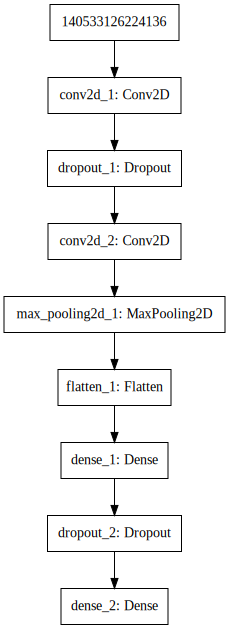

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))



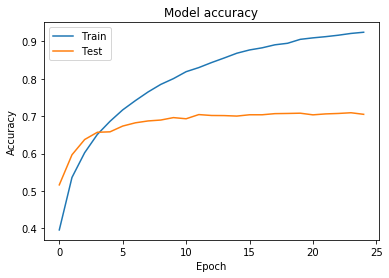

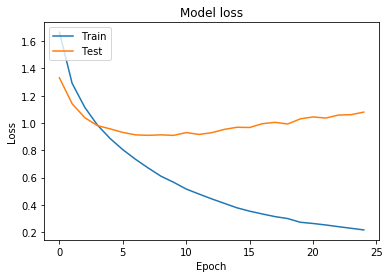

In [12]:
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=32, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_restore_models.ipynb

In [0]:
model.save_weights('./cifar_10.h5', overwrite=True)

In [0]:
import numpy as np

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
__________

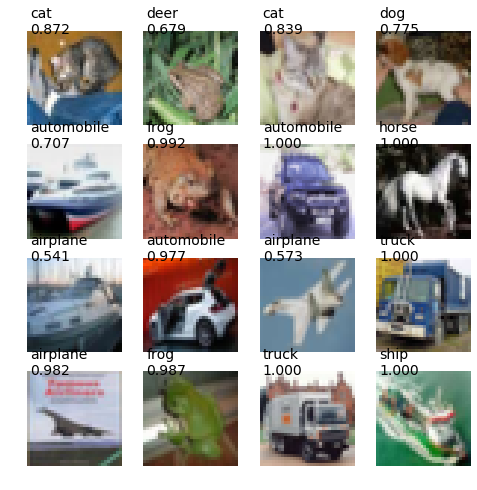

In [22]:
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


cpu_model = define_model()
cpu_model.load_weights('./cifar_10.h5')

from matplotlib import pyplot
%matplotlib inline


def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(testX[:16]), 
                 cpu_model.predict(testX[:16]))


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


cifar10: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

CNN: http://parneetk.github.io/blog/cnn-cifar10/

In [15]:
pip install imageai

     |████████████████████████████████| 153kB 3.4MB/s 


In [17]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "my_model.h5"))
detector.loadModel(
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "horse-running.jpg"), output_image_path=os.path.join(execution_path , "imagenew.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

ValueError: ignored